<a href="https://colab.research.google.com/github/CIA-Oceanix/DLCourse_MOi_2022/blob/main/projects/Retreive_and_Visualize_GLO12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xarray[complete] eccodes hvplot -q

     |████████████████████████████████| 56 kB 2.6 MB/s 
     |████████████████████████████████| 3.2 MB 11.9 MB/s 
     |████████████████████████████████| 355 kB 45.5 MB/s 
     |████████████████████████████████| 2.3 MB 35.2 MB/s 
     |████████████████████████████████| 45 kB 3.3 MB/s 
     |████████████████████████████████| 19.3 MB 26.7 MB/s 
     |████████████████████████████████| 185 kB 48.0 MB/s 
     |████████████████████████████████| 114 kB 42.2 MB/s 
     |████████████████████████████████| 6.6 MB 35.5 MB/s 


In [10]:
!wget -nc https://s3.us-east-1.wasabisys.com/melody/GLO12/mercatorglorys12v1_gl12_mean_20191202_R20191204.nc

--2022-10-04 11:46:17--  https://s3.us-east-1.wasabisys.com/melody/GLO12/mercatorglorys12v1_gl12_mean_20191202_R20191204.nc
Resolving s3.us-east-1.wasabisys.com (s3.us-east-1.wasabisys.com)... 38.27.106.51, 38.27.106.53
Connecting to s3.us-east-1.wasabisys.com (s3.us-east-1.wasabisys.com)|38.27.106.51|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://s3.eu-central-1.wasabisys.com/melody/GLO12/mercatorglorys12v1_gl12_mean_20191202_R20191204.nc [following]
--2022-10-04 11:46:17--  https://s3.eu-central-1.wasabisys.com/melody/GLO12/mercatorglorys12v1_gl12_mean_20191202_R20191204.nc
Resolving s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)... 130.117.252.20, 130.117.252.26, 130.117.252.19, ...
Connecting to s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)|130.117.252.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5223510 (5.0M) [application/x-netcdf]
Saving to: ‘mercatorglorys12v1_gl12

In [2]:
!wget -nc https://s3.us-east-1.wasabisys.com/melody/GLO12/2019_GLO12_UV_T_SLA_EDDIES.nc

--2022-10-04 10:44:05--  https://s3.us-east-1.wasabisys.com/melody/GLO12/2019_GLO12_UV_T_SLA_EDDIES.nc
Resolving s3.us-east-1.wasabisys.com (s3.us-east-1.wasabisys.com)... 38.27.106.53, 38.27.106.51
Connecting to s3.us-east-1.wasabisys.com (s3.us-east-1.wasabisys.com)|38.27.106.53|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://s3.eu-central-1.wasabisys.com/melody/GLO12/2019_GLO12_UV_T_SLA_EDDIES.nc [following]
--2022-10-04 10:44:05--  https://s3.eu-central-1.wasabisys.com/melody/GLO12/2019_GLO12_UV_T_SLA_EDDIES.nc
Resolving s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)... 130.117.252.22, 130.117.252.19, 130.117.252.13, ...
Connecting to s3.eu-central-1.wasabisys.com (s3.eu-central-1.wasabisys.com)|130.117.252.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1850726572 (1.7G) [application/x-netcdf]
Saving to: ‘2019_GLO12_UV_T_SLA_EDDIES.nc’

2019_GLO12_UV_T_SLA 100%[===================>]   1.

In [8]:
import xarray as xr
from matplotlib import pyplot as plt
import scipy.ndimage as ndi
import numpy as np
import holoviews as hv

/usr/local/lib/python3.7/dist-packages/xarray/backends/cfgrib_.py:28: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  "Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. "


In [11]:
data_unique_date = xr.open_dataset('mercatorglorys12v1_gl12_mean_20191202_R20191204.nc')

In [13]:
data = xr.open_dataset('2019_GLO12_UV_T_SLA_EDDIES.nc')

In [14]:
data

<xarray.Dataset>
Dimensions:    (latitude: 360, longitude: 600, time: 357)
Coordinates:
    depth      float32 ...
  * latitude   (latitude) float32 29.92 30.0 30.08 30.17 ... 59.67 59.75 59.83
  * longitude  (longitude) float32 -80.08 -80.0 -79.92 ... -30.33 -30.25 -30.17
  * time       (time) datetime64[ns] 2019-01-01T12:00:00 ... 2019-12-24T12:00:00
Data variables:
    uo         (time, latitude, longitude) float32 ...
    vo         (time, latitude, longitude) float32 ...
    zos        (time, latitude, longitude) float32 ...
    thetao     (time, latitude, longitude) float32 ...
    eddies     (time, latitude, longitude) float64 ...

In [20]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.dataset import random_split

In [16]:
class Glo12Eddies(Dataset):

    def __init__(self, data):

        self.data = data

        print(self.data)

    def __len__(self):

        return self.data.uo.values.shape[0]

    def __getitem__(self, idx):

        image, classes = [self.data.uo[idx].values, self.data.vo[idx].values, self.data.zos[idx].values], self.data.eddies[idx].values

        image = torch.tensor(image)

        classes = torch.tensor([classes])

        return image, classes

In [17]:
dataset_glo12 = Glo12Eddies(data)

<xarray.Dataset>
Dimensions:    (latitude: 360, longitude: 600, time: 357)
Coordinates:
    depth      float32 1.541
  * latitude   (latitude) float32 29.92 30.0 30.08 30.17 ... 59.67 59.75 59.83
  * longitude  (longitude) float32 -80.08 -80.0 -79.92 ... -30.33 -30.25 -30.17
  * time       (time) datetime64[ns] 2019-01-01T12:00:00 ... 2019-12-24T12:00:00
Data variables:
    uo         (time, latitude, longitude) float32 ...
    vo         (time, latitude, longitude) float32 ...
    zos        (time, latitude, longitude) float32 ...
    thetao     (time, latitude, longitude) float32 ...
    eddies     (time, latitude, longitude) float64 ...


In [18]:
len(dataset_glo12)

357

In [24]:
ds_train, ds_valid = torch.utils.data.dataset.random_split(dataset_glo12, [int(len(dataset_glo12) * 0.8), len(dataset_glo12) - int(len(dataset_glo12) * 0.8)])

In [30]:
data_loader_train = DataLoader(ds_train, batch_size = 32, shuffle = True, drop_last = True)
data_loader_valid = DataLoader(ds_valid, batch_size = 32, shuffle = True, drop_last = True)

In [31]:
len(data_loader_train), len(data_loader_valid)

(8, 2)

In [32]:
for mini_batch, [image, label] in enumerate(data_loader_train):
  print('Mini batch # ', mini_batch, ', the shapes of image ', image.shape, ', of labels ', label.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)


Mini batch #  0 , the shapes of image  torch.Size([32, 3, 360, 600]) , of labels  torch.Size([32, 1, 360, 600])
Mini batch #  1 , the shapes of image  torch.Size([32, 3, 360, 600]) , of labels  torch.Size([32, 1, 360, 600])
Mini batch #  2 , the shapes of image  torch.Size([32, 3, 360, 600]) , of labels  torch.Size([32, 1, 360, 600])
Mini batch #  3 , the shapes of image  torch.Size([32, 3, 360, 600]) , of labels  torch.Size([32, 1, 360, 600])
Mini batch #  4 , the shapes of image  torch.Size([32, 3, 360, 600]) , of labels  torch.Size([32, 1, 360, 600])
Mini batch #  5 , the shapes of image  torch.Size([32, 3, 360, 600]) , of labels  torch.Size([32, 1, 360, 600])
Mini batch #  6 , the shapes of image  torch.Size([32, 3, 360, 600]) , of labels  torch.Size([32, 1, 360, 600])
Mini batch #  7 , the shapes of image  torch.Size([32, 3, 360, 600]) , of labels  torch.Size([32, 1, 360, 600])


In [33]:
print('Sizes of maps : ' + str(data.uo[0].shape))

Sizes of maps : (360, 600)


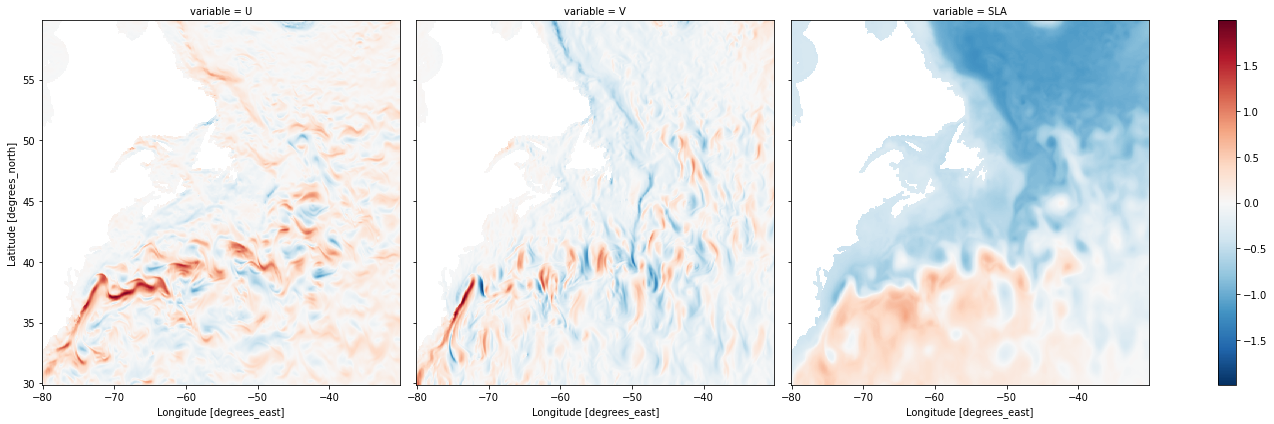

In [35]:
xr.Dataset({
    'U': data.uo,
    'V': data.vo,
    'SLA' : data.zos,
}).to_array().isel(time=50).plot.pcolormesh(col='variable', figsize=(20, 6))

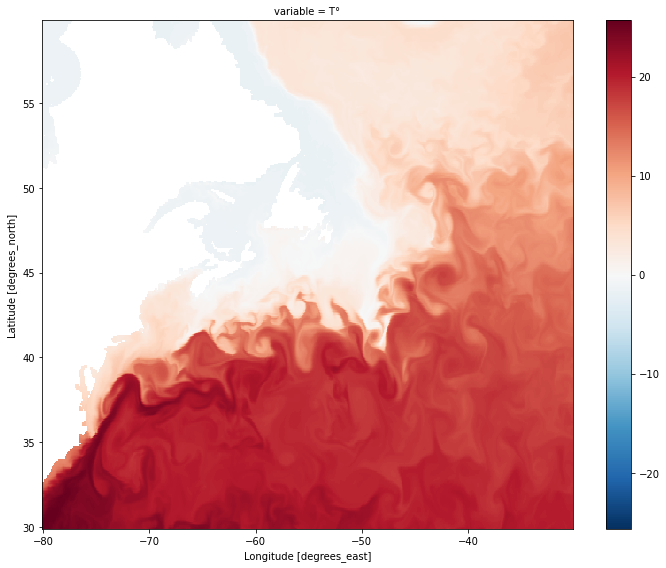

In [36]:
xr.Dataset({
    'T°' : data.thetao,
}).to_array().isel(time=50).plot.pcolormesh(col='variable', figsize=(10, 8))

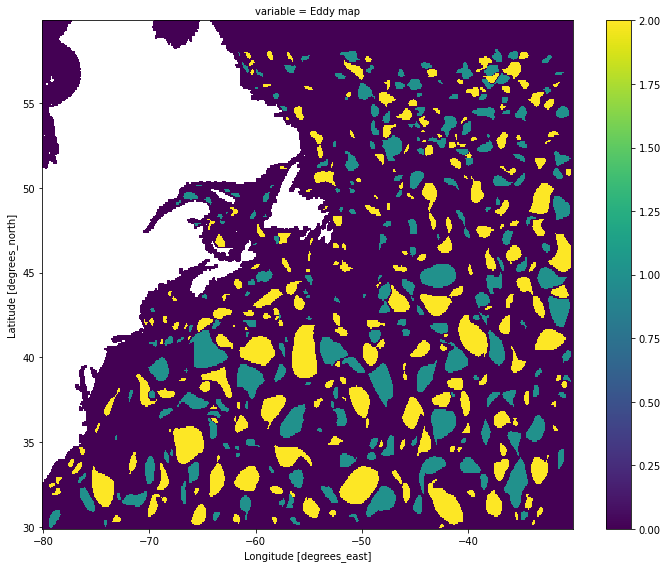

In [38]:
xr.Dataset({
    'Eddy map' : data.eddies,
}).to_array().isel(time=50).plot.pcolormesh(col='variable', figsize=(10, 8))

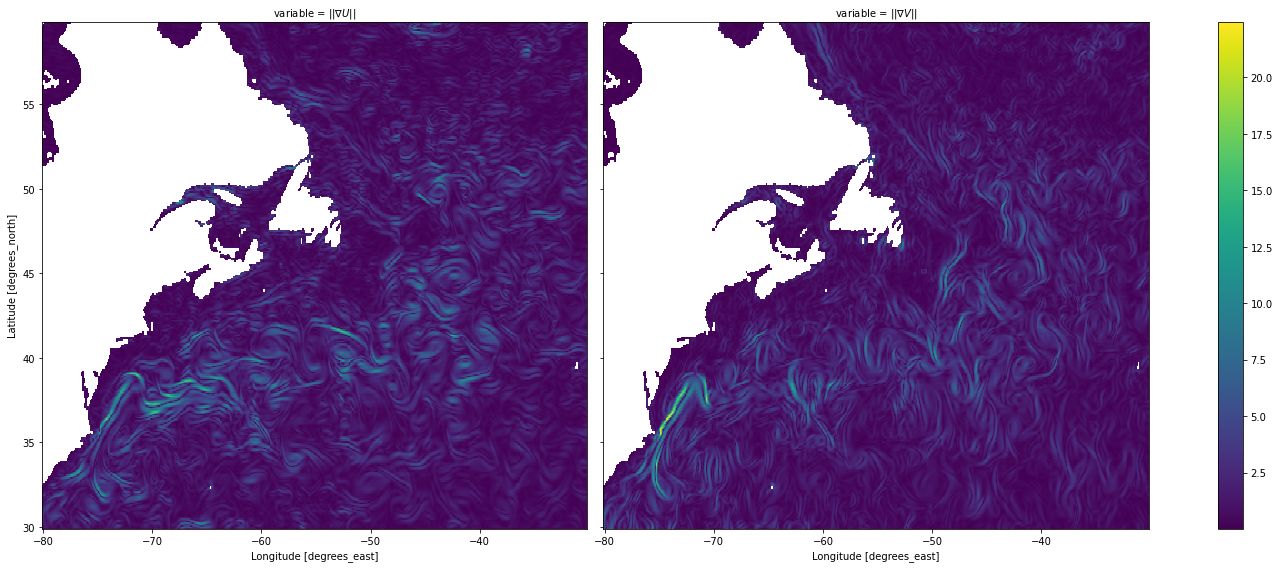

In [39]:
def sobel(da):
    dx = xr.apply_ufunc(lambda _da: ndi.sobel(_da, -1), da)
    dy = xr.apply_ufunc(lambda _da: ndi.sobel(_da, -2), da)
    return np.hypot(dx, dy)

grad_ds_UV = xr.Dataset({
    r'||$\nabla U||$': data.uo.pipe(sobel),
    r'||$\nabla V||$': data.vo.pipe(sobel),
})
grad_ds_UV.to_array().isel(time=50).plot.pcolormesh(col='variable', figsize=(20, 8), cmap='viridis')

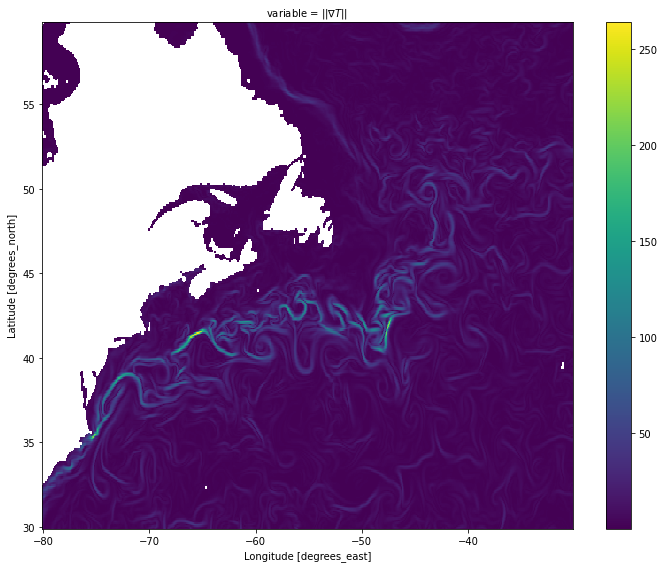

In [40]:
def sobel(da):
    dx = xr.apply_ufunc(lambda _da: ndi.sobel(_da, -1), da)
    dy = xr.apply_ufunc(lambda _da: ndi.sobel(_da, -2), da)
    return np.hypot(dx, dy)

grad_ds_T = xr.Dataset({
    r'||$\nabla T||$': data.thetao.pipe(sobel),
})
grad_ds_T.to_array().isel(time=50).plot.pcolormesh(col='variable', figsize=(10, 8), cmap='viridis')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

:Layout
   .HoloMap.Vertical_line_vertical_line_reverse_over_nabla_U_vertical_line_vertical_line :HoloMap   [time]
      :QuadMesh   [longitude,latitude]   (||$\nabla U||$)
   .HoloMap.Vertical_line_vertical_line_reverse_over_nabla_V_vertical_line_vertical_line :HoloMap   [time]
      :QuadMesh   [longitude,latitude]   (||$\nabla V||$)
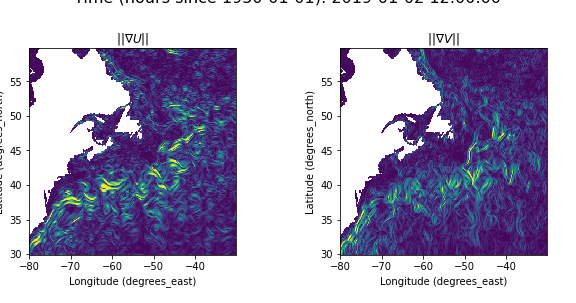

In [42]:
hv.extension('matplotlib')
to_plot_ds = grad_ds_UV.isel(time=slice(1, 15, 1))    # ONLY IF MORE THEN ONE TIME !

clim = (
    to_plot_ds[[r'||$\nabla U||$', r'||$\nabla V||$']]
    .to_array().pipe(lambda da: (da.quantile(0.005).item(), da.quantile(0.995).item()))
)
images = hv.Layout([
        hv.Dataset(to_plot_ds)
        .to(hv.QuadMesh, ['longitude', 'latitude'], v).relabel(v)
        .options(cmap='viridis',clim=clim)
        for v in to_plot_ds
]).cols(3).opts(sublabel_format="")

hv.output(images, holomap='gif', fps=2, dpi=125)